ניתוח ויזואלי של חריגות בכמויות רכישה לפי לקוחות

Number of customers with anomalies: 65
List of customers with anomalies:
[ 3  4 22 23 25 26 27 28 30 32 33 62  1  2  7 10 11 12 13 14 16 21 24 35
 36 38 39 40 42 43 45 49 50 51 52 54 55 56 57 58 59 61 64 66 67 68 69 70
 74 76 77 78 83  5 20 31 41 48 60 71 73 84 44 46 75]
Number of customers without anomalies: 19
מס לקוח
1      4
2      6
3     26
4     36
5      2
      ..
76     8
77     8
78     4
83     4
84     4
Length: 65, dtype: int64


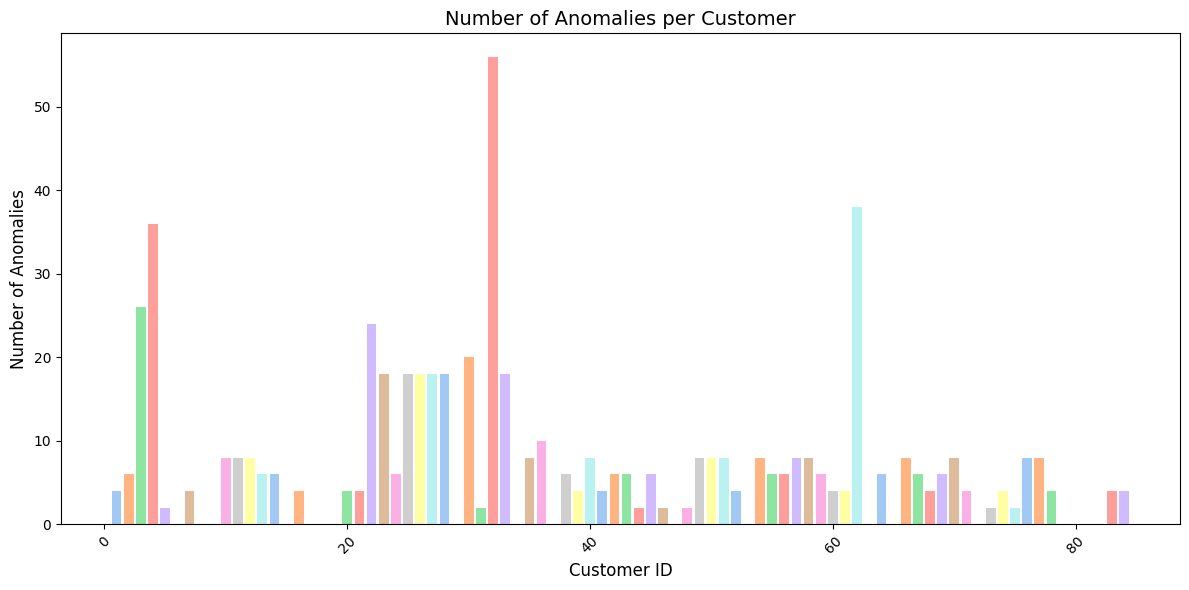

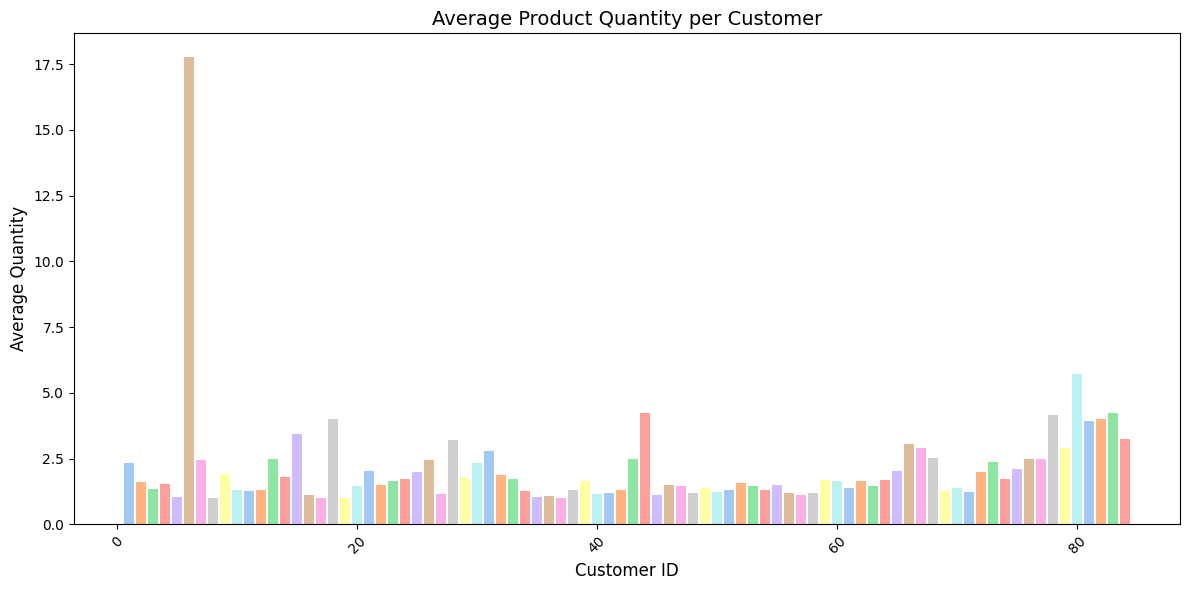

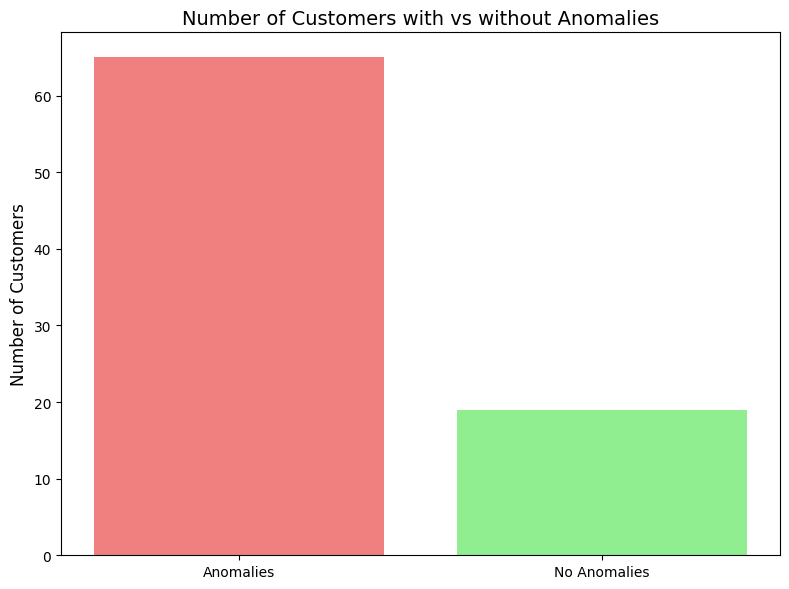

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# קריאת הנתונים
data = pd.read_excel(r"/content/data.xlsx")

# חישוב ממוצע וסטיית תקן לכל לקוח
grouped = data.groupby('מס לקוח')['כמות']
data['כמות ממוצעת'] = grouped.transform('mean')
data['סטיית תקן'] = grouped.transform('std')

# חישוב טווח תחתון ועליון
data['טווח תחתון'] = data['כמות ממוצעת'] - 2 * data['סטיית תקן']
data['טווח עליון'] = data['כמות ממוצעת'] + 2 * data['סטיית תקן']

# בדיקת חריגה
data['חריגה'] = (data['כמות'] < data['טווח תחתון']) | (data['כמות'] > data['טווח עליון'])

# חישוב הכמות החריגה (רק לשורות עם חריגה)
data['כמות חריגה'] = np.where(data['חריגה'], data['כמות'] - data['כמות ממוצעת'], 0)


# חישוב כמות הלקוחות עם חריגה
num_customers_with_anomalies = data[data['חריגה'] == True]['מס לקוח'].nunique()
print(f"Number of customers with anomalies: {num_customers_with_anomalies}")


# קבלת הרשימה של כל הלקוחות עם חריגה
customers_with_anomalies = data[data['חריגה'] == True]['מס לקוח'].unique()
print("List of customers with anomalies:")
print(customers_with_anomalies)

total_customers = data['מס לקוח'].nunique()


# חישוב כמות הלקוחות בלי חריגה על ידי חיסור
num_customers_without_anomalies = total_customers - num_customers_with_anomalies
print(f"Number of customers without anomalies: {num_customers_without_anomalies}")


# סופרים את כמות החריגות לכל לקוח
customer_anomalies = data[data['חריגה'] == True].groupby('מס לקוח').size()

print(customer_anomalies)

# מוודאים שהנתונים ממוינים לפי מספר הלקוח
customer_anomalies = customer_anomalies.sort_index()

# יצירת צבעים פסטליים
colors = sns.color_palette("pastel", n_colors=len(customer_anomalies))

# יצירת גרף עמודות
plt.figure(figsize=(12, 6))
plt.bar(customer_anomalies.index, customer_anomalies.values, color=colors)

# הוספת תוויות וכותרות
plt.title('Number of Anomalies per Customer', fontsize=14)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Number of Anomalies', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# הצגת הגרף
plt.tight_layout()
plt.show()

# חישוב הכמות הממוצעת של המוצרים לכל לקוח
average_quantity_per_customer = data.groupby('מס לקוח')['כמות'].mean()

# מיון לפי מספר הלקוח
average_quantity_per_customer = average_quantity_per_customer.sort_index()

# יצירת צבעים פסטליים
colors = sns.color_palette("pastel", n_colors=len(average_quantity_per_customer))

# יצירת גרף עמודות
plt.figure(figsize=(12, 6))
plt.bar(average_quantity_per_customer.index, average_quantity_per_customer.values, color=colors)

# הוספת תוויות וכותרות
plt.title('Average Product Quantity per Customer', fontsize=14)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Average Quantity', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# הצגת הגרף
plt.tight_layout()
plt.show()

# יצירת גרף עמודות
plt.figure(figsize=(8, 6))
plt.bar(['Anomalies', 'No Anomalies'], [num_customers_with_anomalies, num_customers_without_anomalies], color=['lightcoral', 'lightgreen'])

# הוספת כותרת
plt.title('Number of Customers with vs without Anomalies', fontsize=14)

# הוספת תוויות לציר ה-Y
plt.ylabel('Number of Customers', fontsize=12)

# הצגת הגרף
plt.tight_layout()
plt.show()





















בדיקות איכות ואימות תקינות הנתונים

In [2]:
import pandas as pd

# קריאת הנתונים
data = pd.read_excel(r"/content/data.xlsx")

# הסרת רווחים מיותרים בשמות העמודות
data.columns = data.columns.str.strip()

# הצגת שמות העמודות על מנת לבדוק אם יש בעיות בשמות
print("שמות העמודות בקובץ הנתונים:", data.columns.tolist())


# פונקציה לבדיקת ערכים חסרים בכל העמודות
def check_missing_values(df):
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("נמצאו ערכים חסרים בעמודות הבאות:")
        print(missing_values[missing_values > 0])
    else:
        print("לא נמצאו ערכים חסרים בנתונים.")


# פונקציה לבדיקת עמודות טקסטואליות
def check_text_columns(df, columns):
    for column in columns:
        column = column.strip()  # לוודא שאין רווחים מיותרים בשם העמודה
        if column not in df.columns:
            print(f"עמודה '{column}' אינה קיימת בקובץ הנתונים.")
            continue
        # בדיקת ערכים שאינם טקסטואליים
        invalid_rows = []
        for index, value in df[column].items():
            if pd.notnull(value) and not isinstance(value, str):  # ערכים שאינם מחרוזות
                invalid_rows.append((index, value))

        if not invalid_rows:
            print(f"כל הערכים בעמודה '{column}' תקינים (טקסטואליים בלבד).")
        else:
            print(f"נמצאו ערכים לא חוקיים בעמודה '{column}':")
            for row in invalid_rows:
                print(f"שורה {row[0]}: {row[1]}")

# פונקציה לבדיקת עמודות מספריות
def check_numeric_columns(df, columns):
    for column in columns:
        column = column.strip()  # לוודא שאין רווחים מיותרים בשם העמודה
        if column not in df.columns:
            print(f"עמודה '{column}' אינה קיימת בקובץ הנתונים.")
            continue
        # בדיקת ערכים שאינם מספריים
        invalid_rows = []
        for index, value in df[column].items():
            if pd.notnull(value) and not isinstance(value, (int, float)):
                invalid_rows.append((index, value))

        if not invalid_rows:
            print(f"כל הערכים בעמודה '{column}' הם מספריים.")
        else:
            print(f"נמצאו ערכים לא חוקיים בעמודה '{column}':")
            for row in invalid_rows:
                print(f"שורה {row[0]}: {row[1]}")

# פונקציה לבדיקת כפילויות של צירוף 'מקט', 'מוצר' ו'מס חשבונית'
def check_product_invoice_duplicates(df):
    # בדיקת אם כל העמודות קיימות
    required_columns = ['מס חשבונית', 'מוצר', 'מק"ט']
    missing_columns = [col for col in required_columns if col not in df.columns]

    if missing_columns:
        print(f"חסרות עמודות: {', '.join(missing_columns)} עבור הבדיקה.")
        return

    # חיפוש כפילויות בעמודות 'מקט', 'מוצר' ו'מס חשבונית'
    duplicates = df[df.duplicated(subset=['מק"ט', 'מוצר', 'מס חשבונית'], keep=False)]

    # אם נמצאו כפילויות, הצגתן
    if not duplicates.empty:
        print("נמצאו כפילויות של מקט, מוצר ומס חשבונית:")
        print(duplicates[['מק"ט', 'מוצר', 'מס חשבונית']])
    else:
        print("לא נמצאו כפילויות של מקט, מוצר ומס חשבונית.")





# פונקציה לבדיקת עמודת 'כמות' שהיא מכילה רק מספרים שלמים
def check_quantity_column(df):
    if 'כמות' not in df.columns:
        print("עמודה 'כמות' אינה קיימת בקובץ הנתונים.")
        return

    invalid_rows = []
    for index, value in df['כמות'].items():
        if pd.notnull(value) and (not isinstance(value, int) or value != int(value)):
            invalid_rows.append((index, value))

    if not invalid_rows:
        print("כל הערכים בעמודה 'כמות' הם מספרים שלמים.")
    else:
        print("נמצאו ערכים לא חוקיים בעמודה 'כמות':")
        for row in invalid_rows:
            print(f"שורה {row[0]}: {row[1]}")

# רשימת העמודות לבדיקות
text_columns = ['מוצר', 'חנות']
numeric_columns = ['מק"ט', 'כמות', 'מס חשבונית', 'מס לקוח']
unique_column = 'מס חשבונית'

# הרצת הבדיקות
print("\n--- בדיקת ערכים חסרים ---")
check_missing_values(data)

print("\n--- בדיקת עמודות טקסטואליות ---")
check_text_columns(data, text_columns)

print("\n--- בדיקת עמודות מספריות ---")
check_numeric_columns(data, numeric_columns)

print("\n--- בדיקת כפילויות של מוצר ומס חשבונית ---")
check_product_invoice_duplicates(data)

print("\n--- בדיקת עמודת 'כמות' ---")
check_quantity_column(data)

import pandas as pd

# קריאת הנתונים (לדוגמה, מקובץ CSV)
df =pd.read_excel(r"/content/data.xlsx")

# ספירת מספר החשבוניות השונות
unique_invoices = df["מס חשבונית"].nunique()

print(f"מספר החשבוניות השונות: {unique_invoices}")

# קיבוץ הנתונים כך שכל צירוף של 'מס חשבונית' ו-'מס לקוח' יופיע פעם אחת
grouped_df = df.groupby(["מס חשבונית", "מס לקוח"]).size().reset_index(name="count")

# בדיקה האם קיימות כפילויות של 'מס חשבונית' ו-'מס לקוח'
duplicated_invoice_customer = grouped_df[grouped_df.duplicated(subset=["מס חשבונית", "מס לקוח"], keep=False)]

if not duplicated_invoice_customer.empty:
    print("נמצאו כפילויות של מס חשבונית ומס לקוח:")
    print(duplicated_invoice_customer)
else:
    print("לא נמצאו כפילויות של מס חשבונית ומס לקוח.")


import pandas as pd

# קריאת הנתונים
df = pd.read_excel(r"/content/data.xlsx")

# הסרת רווחים מיותרים בשמות העמודות
df.columns = df.columns.str.strip()

# בדיקה שהעמודות קיימות
required_columns = ["מס לקוח", "מס חשבונית"]
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"חסרות עמודות: {', '.join(missing_columns)} עבור הבדיקה.")
else:
    # ספירת מספר החשבוניות השונות לכל לקוח
    invoices_per_customer = df.groupby("מס לקוח")["מס חשבונית"].nunique().reset_index()

    # שינוי שם העמודה לשם מובן יותר
    invoices_per_customer.columns = ["מס לקוח", "מספר חשבוניות"]

    print("\n--- מספר חשבוניות לכל לקוח ---")
    print(invoices_per_customer.to_string(index=False))







שמות העמודות בקובץ הנתונים: ['מק"ט', 'מוצר', 'חנות', 'כמות', 'מחיר', 'מס חשבונית', 'מס לקוח']

--- בדיקת ערכים חסרים ---
לא נמצאו ערכים חסרים בנתונים.

--- בדיקת עמודות טקסטואליות ---
כל הערכים בעמודה 'מוצר' תקינים (טקסטואליים בלבד).
כל הערכים בעמודה 'חנות' תקינים (טקסטואליים בלבד).

--- בדיקת עמודות מספריות ---
כל הערכים בעמודה 'מק"ט' הם מספריים.
כל הערכים בעמודה 'כמות' הם מספריים.
כל הערכים בעמודה 'מס חשבונית' הם מספריים.
כל הערכים בעמודה 'מס לקוח' הם מספריים.

--- בדיקת כפילויות של מוצר ומס חשבונית ---
לא נמצאו כפילויות של מקט, מוצר ומס חשבונית.

--- בדיקת עמודת 'כמות' ---
כל הערכים בעמודה 'כמות' הם מספרים שלמים.
מספר החשבוניות השונות: 1502
לא נמצאו כפילויות של מס חשבונית ומס לקוח.

--- מספר חשבוניות לכל לקוח ---
 מס לקוח  מספר חשבוניות
       1             18
       2             18
       3             18
       4             18
       5             18
       6             18
       7             18
       8             18
       9             18
      10             18
      11  

תרשים פיזור: סך רכישות מול מספר חריגות לכל לקוח

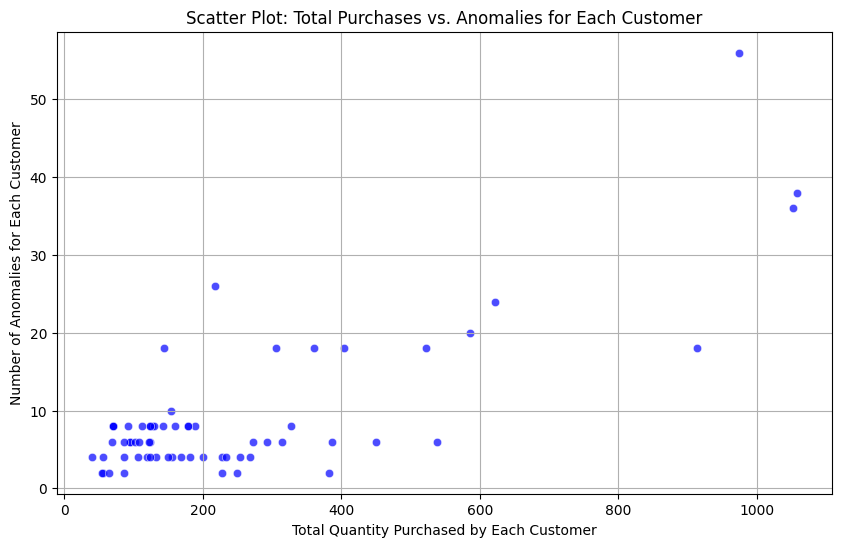

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# קיבוץ לפי 'מס לקוח' ו-'מס חשבונית' ואז סיכום הכמויות שנרכשו בכל חשבונית
total_quantity_per_invoice = data.groupby(['מס לקוח', 'מס חשבונית'])['כמות'].sum()

# סך כל הרכישות עבור כל לקוח
total_quantity_per_customer_all = total_quantity_per_invoice.groupby('מס לקוח').sum()

# יצירת גרף פיזור: ציר X הוא סך כל הרכישות לכל לקוח
# וציר Y הוא מספר החריגות לכל לקוח
plt.figure(figsize=(10, 6))
sns.scatterplot(x=total_quantity_per_customer_all, y=customer_anomalies, alpha=0.7, color='blue')
plt.title('Scatter Plot: Total Purchases vs. Anomalies for Each Customer')
plt.xlabel('Total Quantity Purchased by Each Customer')
plt.ylabel('Number of Anomalies for Each Customer')
plt.grid(True)
plt.show()



גרף עמודות מוערם: סך הרכישות לכל לקוח מול כמות החריגות (לקוחות עם חריגות בלבד)

   מס לקוח  כמות  כמות חריגה
0        1     7    4.846154
1        2     9    5.892308
2        3    49   28.487179
3        4   108   68.526316
4        5     2    0.974359


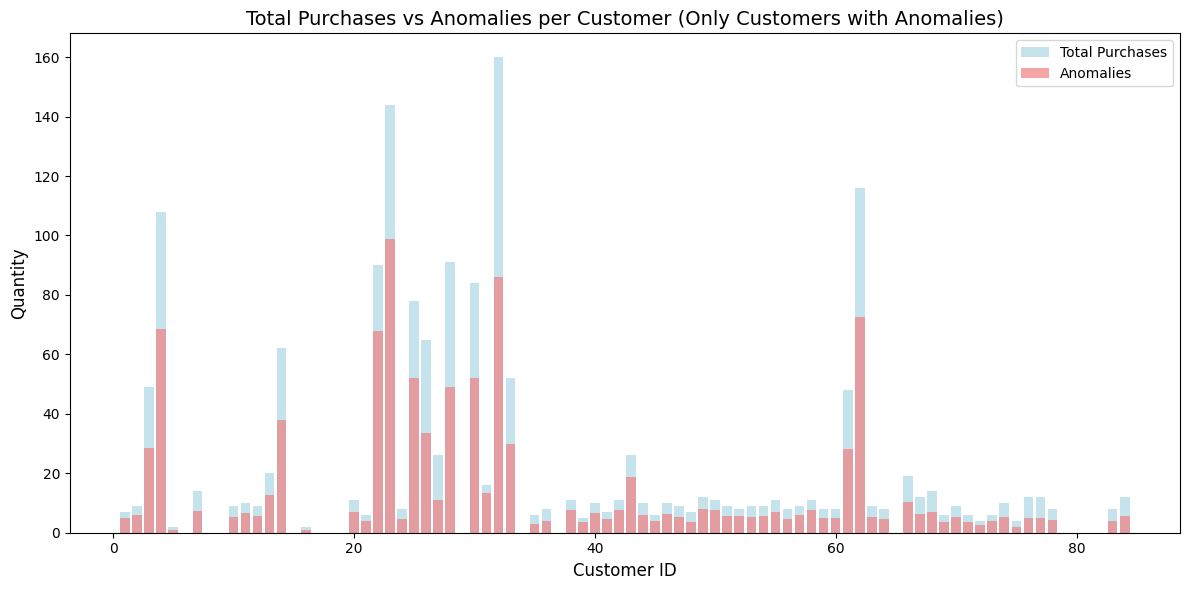

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# קריאת הנתונים
data = pd.read_excel(r"/content/data.xlsx")

# חישוב ממוצע וסטיית תקן לכל לקוח
grouped = data.groupby('מס לקוח')['כמות']
data['כמות ממוצעת'] = grouped.transform('mean')
data['סטיית תקן'] = grouped.transform('std')

# חישוב טווח תחתון ועליון
data['טווח תחתון'] = data['כמות ממוצעת'] - 2 * data['סטיית תקן']
data['טווח עליון'] = data['כמות ממוצעת'] + 2 * data['סטיית תקן']

# חישוב חריגה
data['חריגה'] = (data['כמות'] < data['טווח תחתון']) | (data['כמות'] > data['טווח עליון'])

# חישוב כמות החריגה
data['כמות חריגה'] = np.where(data['חריגה'], data['כמות'] - data['כמות ממוצעת'], 0)

# סינון רק את הלקוחות עם חריגה
customers_with_anomalies = data[data['כמות חריגה'] != 0]

# חיבור כמות הרכישות עם כמות החריגות לכל לקוח
customer_anomalies = customers_with_anomalies.groupby('מס לקוח').agg({'כמות': 'sum', 'כמות חריגה': 'sum'}).reset_index()

# הצגת ראשית הנתונים כדי לוודא שהחיבור נעשה נכון
print(customer_anomalies.head())

# יצירת גרף עמודות
plt.figure(figsize=(12, 6))

# גרף ראשון של כמות הרכישות
plt.bar(customer_anomalies['מס לקוח'], customer_anomalies['כמות'], label='Total Purchases', color='lightblue', alpha=0.7)

# גרף שני של כמות החריגות
plt.bar(customer_anomalies['מס לקוח'], customer_anomalies['כמות חריגה'], label='Anomalies', color='lightcoral', alpha=0.7)

# הוספת כותרות וסטייל
plt.title('Total Purchases vs Anomalies per Customer (Only Customers with Anomalies)', fontsize=14)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()


גרף עמודות: אחוז החריגות ברכישות לכל לקוח (לקוחות עם חריגות בלבד)

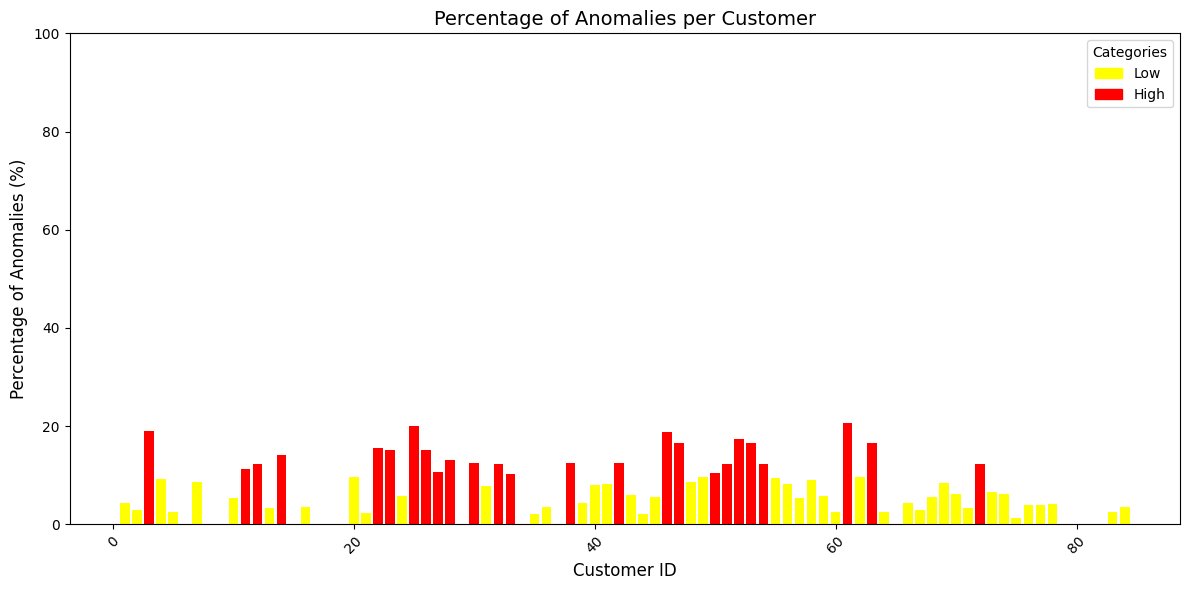

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# קריאת הנתונים
data = pd.read_excel(r"/content/data.xlsx")

# חישוב ממוצע וסטיית תקן לכל לקוח
grouped = data.groupby('מס לקוח')['כמות']
data['כמות ממוצעת'] = grouped.transform('mean')
data['סטיית תקן'] = grouped.transform('std')

# חישוב טווח תחתון ועליון
data['טווח תחתון'] = data['כמות ממוצעת'] - 2 * data['סטיית תקן']
data['טווח עליון'] = data['כמות ממוצעת'] + 2 * data['סטיית תקן']

# חישוב חריגה
data['חריגה'] = (data['כמות'] < data['טווח תחתון']) | (data['כמות'] > data['טווח עליון'])

# חישוב כמות החריגה
data['כמות חריגה'] = np.where(data['חריגה'], data['כמות'] - data['כמות ממוצעת'], 0)

# חישוב כמות הרכישות הכוללת לכל לקוח + כמות החריגות
customer_stats = data.groupby('מס לקוח').agg({'כמות': 'sum', 'כמות חריגה': 'sum'}).reset_index()

# חישוב אחוז החריגות
customer_stats['אחוז חריגות'] = (customer_stats['כמות חריגה'] / customer_stats['כמות']) * 100

# הוספת קטגוריות באנגלית
customer_stats['Category'] = np.where(customer_stats['אחוז חריגות'] > 10, 'High',
                               np.where(customer_stats['אחוז חריגות'] > 0, 'Low', 'No Anomalies'))

# קביעת צבעים לפי קטגוריה
colors = {'Low': 'yellow', 'High': 'red'}
customer_stats['Color'] = customer_stats['Category'].map(colors)

# סינון רק לקוחות עם חריגות (לא לכלול 'No Anomalies')
filtered_stats = customer_stats[customer_stats['Category'] != 'No Anomalies']

# יצירת גרף עמודות
plt.figure(figsize=(12, 6))
plt.bar(filtered_stats['מס לקוח'], filtered_stats['אחוז חריגות'], color=filtered_stats['Color'])

# הגדרת תחום הציר האנכי בין 0 ל-100%
plt.ylim(0, 100)

# הוספת כותרות וסטייל
plt.title('Percentage of Anomalies per Customer', fontsize=14)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Percentage of Anomalies (%)', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)

# הוספת מקרא (Legend)
from matplotlib.patches import Patch
legend_patches = [Patch(color=colors[label], label=label) for label in colors]
plt.legend(handles=legend_patches, title="Categories", fontsize=10)

plt.tight_layout()
plt.show()


מימוש מודלים

In [ ]:

!pip install imbalanced-learn openpyxl

Data saved to data_with_features.xlsx

Model: Decision Tree
Precision: 0.889
Recall: 0.978
F1 Score: 0.932
Accuracy: 0.991
Confusion Matrix:
[[2816   22]
 [   4  177]]
----------------------------------------

Model: Random Forest
Precision: 0.607
Recall: 0.956
F1 Score: 0.742
Accuracy: 0.960
Confusion Matrix:
[[2726  112]
 [   8  173]]
----------------------------------------

Model: Support Vector Machine (SVM)
Precision: 0.947
Recall: 0.989
F1 Score: 0.968
Accuracy: 0.996
Confusion Matrix:
[[2828   10]
 [   2  179]]
----------------------------------------


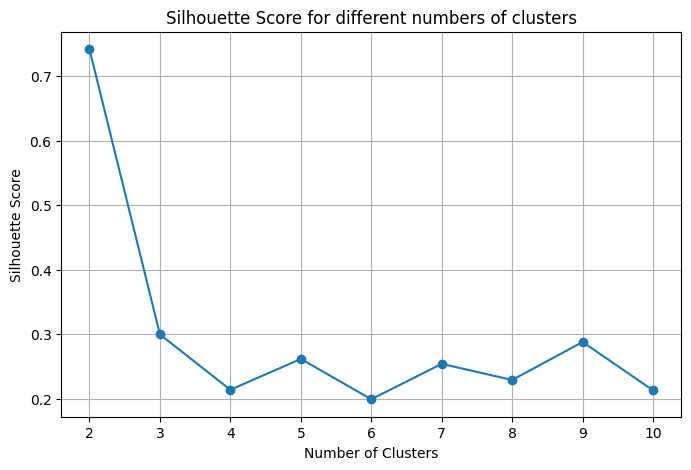

The best number of clusters is: 2 with a silhouette score of 0.74


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# טעינת הנתונים
data = pd.read_excel("/content/data.xlsx")
data.columns = data.columns.str.strip()# ניקוי שמות העמודות מרווחים
data.dropna(inplace=True) # מחיקת ערכים חסרים במידה וקיימים

# יצירת מאפייני משתמש
def create_user_features(df):
  # חישוב סטטיסטיקות לכל משתמש לפי מס לקוח
    user_stats = df.groupby('מס לקוח').agg({
        'כמות': ['mean', 'std', 'min', 'max', 'count'], # ממוצע, סטיית תקן, מינימום, מקסימום, וספירת שורות לפי המאפיין כמות
        'מחיר': ['mean', 'std', 'min', 'max'] # ממוצע, סטיית תקן, מינימום ומקסימום לפי מאפיין מחיר
    }).reset_index()
    user_stats.columns = ['_'.join(col).strip() if col[1] else col[0] for col in user_stats.columns]    # שינוי שמות עמודות לשמות חד-ממדיים


     # הוספת עמודות לטווחים
    user_stats['כמות_טווח'] = user_stats['כמות_max'] - user_stats['כמות_min']
    user_stats['מחיר_טווח'] = user_stats['מחיר_max'] - user_stats['מחיר_min']
    return user_stats

# יצירת מאפייני מוצר
def create_item_features(df):
    item_stats = df.groupby('מק"ט').agg({# חישוב סטטיסטיקות לכל מוצר לפי מק"ט
        'כמות': ['mean', 'std', 'min', 'max'],
        'מחיר': ['mean', 'std']
    }).reset_index()
    item_stats.columns = ['_'.join(col).strip() if col[1] else col[0] for col in item_stats.columns] # שינוי שמות עמודות
    return item_stats

# יצירת מאפייני משתמשים ומוצרים
user_features = create_user_features(data)
item_features = create_item_features(data)

# מיזוג המאפיינים המקושרים למס לקוח ומק"ט
data = data.merge(user_features, on='מס לקוח', how='left')
data = data.merge(item_features, on='מק"ט', how='left')

# הגדרת חריגים לפי כמות לכל לקוח: ממוצע ± 2 סטיות תקן
data['כמות_ממוצעת'] = data.groupby('מס לקוח')['כמות'].transform('mean')
data['כמות_std'] = data.groupby('מס לקוח')['כמות'].transform('std')
data['טווח תחתון'] = data['כמות_ממוצעת'] - 2 * data['כמות_std']
data['טווח עליון'] = data['כמות_ממוצעת'] + 2 * data['כמות_std']
data['חריגה'] = ((data['כמות'] < data['טווח תחתון']) | (data['כמות'] > data['טווח עליון'])).astype(int)# חריגה = אם הערך מחוץ לטווח


# הגדרת מאפיינים מספריים
numeric_features = ['כמות', 'מחיר',
                    'כמות_mean_x', 'כמות_std_x', 'כמות_min_x', 'כמות_max_x', 'כמות_count',
                    'מחיר_mean_x', 'מחיר_std_x', 'מחיר_min', 'מחיר_max',
                    'כמות_טווח', 'מחיר_טווח',
                    'כמות_mean_y', 'כמות_std_y', 'כמות_min_y', 'כמות_max_y',
                    'מחיר_mean_y', 'מחיר_std_y']

categorical_features = ['מק"ט', 'מס חשבונית'] # מאפיינים קטגוריים

# טרנספורמציית עמודות:
# סטנדרטיזציה למאפיינים מספריים
# קידוד one-hot למאפיינים קטגוריים
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# הפרדת משתנים תלויים ובלתי תלויים
X = data.drop(['חריגה', 'טווח תחתון', 'טווח עליון', 'כמות_ממוצעת', 'כמות_std'], axis=1)#משתנים בלתי תלויים
y = data['חריגה']#משתנה תלוי
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # חלוקת הנתונים לסט אימון וסט בדיקה (70%-30%)

# עיבוד מקדים לסט האימון לצורך SMOTE
X_train_preprocessed = preprocessor.fit_transform(X_train)

# איזון הנתונים באמצעות SMOTE (יצירת דוגמאות סינתטיות)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# שמירת הנתונים עם המאפיינים החדשים לקובץ אקסל
data.to_excel("data_with_features.xlsx", index=False)
print("Data saved to data_with_features.xlsx")


# פונקציה לאימון והערכת מודל
def train_and_evaluate_model(model, model_name):
    model.fit(X_train_resampled, y_train_resampled)#אימון המודל לאחר האיזון
    X_test_transformed = preprocessor.transform(X_test)#טרנספורמציה לסט הבדיקה
    y_pred = model.predict(X_test_transformed) # חיזוי התוצאות

    # חישוב מדדים
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # הדפסת התוצאות
    print(f"\nModel: {model_name}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"Accuracy: {accuracy:.3f}")
    print("Confusion Matrix:")
    print(cm)
    print("-" * 40)


# רשימת מודלים עם פרמטרים מכווננים
models = [
    (DecisionTreeClassifier(class_weight='balanced', random_state=42), "Decision Tree"),# עץ החלטה
    (RandomForestClassifier(
        class_weight='balanced_subsample',
        n_estimators=200,# מספר עצים ביער
        max_depth=15,# עומק מרבי
        min_samples_leaf=4,# מינימום דגימות לעלה
        random_state=42), "Random Forest"),
    (SVC(class_weight='balanced', kernel='rbf', C=1.0, random_state=42), "Support Vector Machine (SVM)")
]

# הרצת המודלים והערכתם
for model, name in models:
    train_and_evaluate_model(model, name)

# ניתוח אשכולות בעזרת KMeans + מדד Silhouette

def find_best_kmeans_clusters(X_transformed, min_clusters=2, max_clusters=10):
    silhouette_scores = []

    # עבור כל מספר אשכולות מ-2 ועד 10
    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters)
        clusters = kmeans.fit_predict(X_transformed) # מציאת אשכולות
        score = silhouette_score(X_transformed, clusters) # חישוב ציון סילואט
        silhouette_scores.append(score)

    # בחירת מספר האשכולות עם הציון הגבוה ביותר
    best_n_clusters = range(min_clusters, max_clusters + 1)[silhouette_scores.index(max(silhouette_scores))]#מציאת מספר האשכולות הכי טובים לפי טווח הערכים והציונים

    # גרף של ציוני סילואט לפי מספר אשכולות
    plt.figure(figsize=(8,5))
    plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for different numbers of clusters')
    plt.grid(True)
    plt.show()

    print(f"The best number of clusters is: {best_n_clusters} with a silhouette score of {max(silhouette_scores):.2f}")
    return best_n_clusters, max(silhouette_scores)

# הרצת פונקציית האשכולות על הנתונים המאוזנים
best_k, best_score = find_best_kmeans_clusters(X_train_resampled)



Model: Decision Tree
Precision: 0.859
Recall: 0.967
F1 Score: 0.910
Accuracy: 0.989
Confusion Matrix:
[[3747   38]
 [   8  232]]
----------------------------------------

Model: Random Forest
Precision: 0.546
Recall: 0.908
F1 Score: 0.682
Accuracy: 0.950
Confusion Matrix:
[[3604  181]
 [  22  218]]
----------------------------------------

Model: Support Vector Machine (SVM)
Precision: 0.907
Recall: 0.975
F1 Score: 0.940
Accuracy: 0.993
Confusion Matrix:
[[3761   24]
 [   6  234]]
----------------------------------------


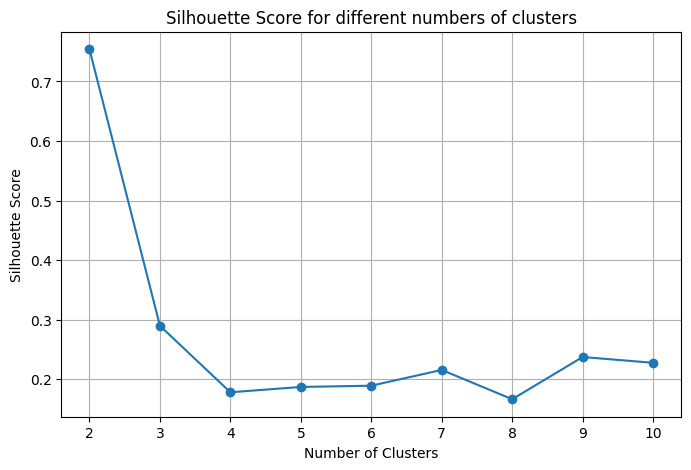

The best number of clusters is: 2 with a silhouette score of 0.75


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load data
data = pd.read_excel("/content/data.xlsx")
data.columns = data.columns.str.strip()
data.dropna(inplace=True)

# Create user features
def create_user_features(df):
    user_stats = df.groupby('מס לקוח').agg({
        'כמות': ['mean', 'std', 'min', 'max', 'count'],
        'מחיר': ['mean', 'std', 'min', 'max']
    }).reset_index()
    user_stats.columns = ['_'.join(col).strip() if col[1] else col[0] for col in user_stats.columns]
    user_stats['כמות_טווח'] = user_stats['כמות_max'] - user_stats['כמות_min']
    user_stats['מחיר_טווח'] = user_stats['מחיר_max'] - user_stats['מחיר_min']
    return user_stats

# Create item features
def create_item_features(df):
    item_stats = df.groupby('מק"ט').agg({
        'כמות': ['mean', 'std', 'min', 'max'],
        'מחיר': ['mean', 'std']
    }).reset_index()
    item_stats.columns = ['_'.join(col).strip() if col[1] else col[0] for col in item_stats.columns]
    return item_stats

# Feature engineering
user_features = create_user_features(data)
item_features = create_item_features(data)

data = data.merge(user_features, on='מס לקוח', how='left')
data = data.merge(item_features, on='מק"ט', how='left')

# Define outliers
data['כמות_ממוצעת'] = data.groupby('מס לקוח')['כמות'].transform('mean')
data['כמות_std'] = data.groupby('מס לקוח')['כמות'].transform('std')
data['טווח תחתון'] = data['כמות_ממוצעת'] - 2 * data['כמות_std']
data['טווח עליון'] = data['כמות_ממוצעת'] + 2 * data['כמות_std']
data['חריגה'] = ((data['כמות'] < data['טווח תחתון']) | (data['כמות'] > data['טווח עליון'])).astype(int)


# Define features
numeric_features = ['כמות', 'מחיר',
                    'כמות_mean_x', 'כמות_std_x', 'כמות_min_x', 'כמות_max_x', 'כמות_count',
                    'מחיר_mean_x', 'מחיר_std_x', 'מחיר_min', 'מחיר_max',
                    'כמות_טווח', 'מחיר_טווח',
                    'כמות_mean_y', 'כמות_std_y', 'כמות_min_y', 'כמות_max_y',
                    'מחיר_mean_y', 'מחיר_std_y']

categorical_features = ['מק"ט', 'מס חשבונית']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Split data
X = data.drop(['חריגה', 'טווח תחתון', 'טווח עליון', 'כמות_ממוצעת', 'כמות_std'], axis=1)
y = data['חריגה']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Preprocess training data for SMOTE
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)



# Helper function להערכת מודל
def train_and_evaluate_model(model, model_name):
    model.fit(X_train_resampled, y_train_resampled)
    X_test_transformed = preprocessor.transform(X_test)
    y_pred = model.predict(X_test_transformed)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"Accuracy: {accuracy:.3f}")
    print("Confusion Matrix:")
    print(cm)
    print("-" * 40)

# Models with tuned parameters for better precision in Random Forest
models = [
    (DecisionTreeClassifier(class_weight='balanced', random_state=42), "Decision Tree"),
    (RandomForestClassifier(
        class_weight='balanced_subsample',
        n_estimators=200,
        max_depth=15,
        min_samples_leaf=4,
        random_state=42), "Random Forest"),
    (SVC(class_weight='balanced', kernel='rbf', C=1.0, random_state=42), "Support Vector Machine (SVM)")
]

# Run models
for model, name in models:
    train_and_evaluate_model(model, name)

# --- KMeans + Silhouette analysis ---

def find_best_kmeans_clusters(X_transformed, min_clusters=2, max_clusters=10):
    silhouette_scores = []

    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters)
        clusters = kmeans.fit_predict(X_transformed)
        score = silhouette_score(X_transformed, clusters)
        silhouette_scores.append(score)

    best_n_clusters = range(min_clusters, max_clusters + 1)[silhouette_scores.index(max(silhouette_scores))]

    plt.figure(figsize=(8,5))
    plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for different numbers of clusters')
    plt.grid(True)
    plt.show()

    print(f"The best number of clusters is: {best_n_clusters} with a silhouette score of {max(silhouette_scores):.2f}")
    return best_n_clusters, max(silhouette_scores)

best_k, best_score = find_best_kmeans_clusters(X_train_resampled)


Data saved to data_with_features.xlsx

Class distribution before SMOTE:
חריגה
0    0.940568
1    0.059432
Name: proportion, dtype: float64

Class distribution after SMOTE:
חריגה
0    0.5
1    0.5
Name: proportion, dtype: float64

Model: Decision Tree
Precision: 0.879
Recall: 0.967
F1 Score: 0.921
Accuracy: 0.990
Confusion Matrix:
[[4690   40]
 [  10  291]]
----------------------------------------

Model: Random Forest
Precision: 0.579
Recall: 0.920
F1 Score: 0.711
Accuracy: 0.955
Confusion Matrix:
[[4529  201]
 [  24  277]]
----------------------------------------

Model: Support Vector Machine (SVM)
Precision: 0.902
Recall: 0.980
F1 Score: 0.939
Accuracy: 0.992
Confusion Matrix:
[[4698   32]
 [   6  295]]
----------------------------------------


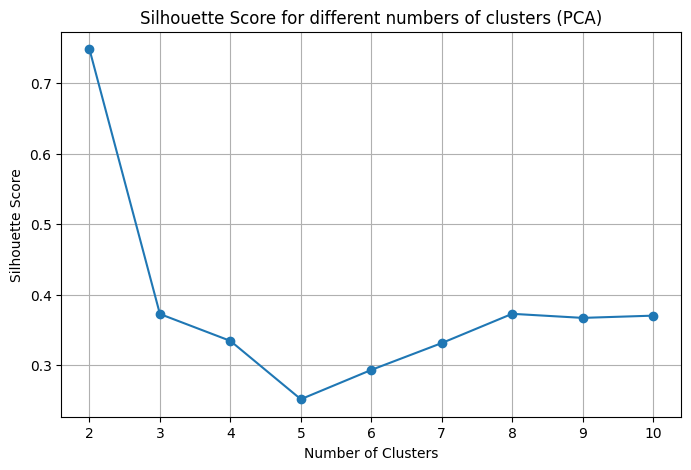

The best number of clusters is: 2 with a silhouette score of 0.75


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- Load data ---
data = pd.read_excel("/content/data.xlsx")
data.columns = data.columns.str.strip()
data.dropna(inplace=True)

# --- Feature engineering functions ---
def create_user_features(df):
    user_stats = df.groupby('מס לקוח').agg({
        'כמות': ['mean', 'std', 'min', 'max', 'count'],
        'מחיר': ['mean', 'std', 'min', 'max']
    }).reset_index()
    user_stats.columns = ['_'.join(col).strip() if col[1] else col[0] for col in user_stats.columns]
    user_stats['כמות_טווח'] = user_stats['כמות_max'] - user_stats['כמות_min']
    user_stats['מחיר_טווח'] = user_stats['מחיר_max'] - user_stats['מחיר_min']
    return user_stats

def create_item_features(df):
    item_stats = df.groupby('מק"ט').agg({
        'כמות': ['mean', 'std', 'min', 'max'],
        'מחיר': ['mean', 'std']
    }).reset_index()
    item_stats.columns = ['_'.join(col).strip() if col[1] else col[0] for col in item_stats.columns]
    return item_stats

# --- Prepare features ---
user_features = create_user_features(data)
item_features = create_item_features(data)

data = data.merge(user_features, on='מס לקוח', how='left')
data = data.merge(item_features, on='מק"ט', how='left')

# --- Define outliers ---
data['כמות_ממוצעת'] = data.groupby('מס לקוח')['כמות'].transform('mean')
data['כמות_std'] = data.groupby('מס לקוח')['כמות'].transform('std')
data['טווח תחתון'] = data['כמות_ממוצעת'] - 2 * data['כמות_std']
data['טווח עליון'] = data['כמות_ממוצעת'] + 2 * data['כמות_std']
data['חריגה'] = ((data['כמות'] < data['טווח תחתון']) | (data['כמות'] > data['טווח עליון'])).astype(int)

data.to_excel("data_with_features.xlsx", index=False)
print("Data saved to data_with_features.xlsx")

# --- Define features for model ---
numeric_features = ['כמות', 'מחיר',
                    'כמות_mean_x', 'כמות_std_x', 'כמות_min_x', 'כמות_max_x', 'כמות_count',
                    'מחיר_mean_x', 'מחיר_std_x', 'מחיר_min', 'מחיר_max',
                    'כמות_טווח', 'מחיר_טווח',
                    'כמות_mean_y', 'כמות_std_y', 'כמות_min_y', 'כמות_max_y',
                    'מחיר_mean_y', 'מחיר_std_y']

categorical_features = ['מק"ט', 'מס חשבונית']

# --- Preprocessor ---
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# --- Split data ---
X = data.drop(['חריגה', 'טווח תחתון', 'טווח עליון', 'כמות_ממוצעת', 'כמות_std'], axis=1)
y = data['חריגה']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# --- Preprocess training data ---
X_train_preprocessed = preprocessor.fit_transform(X_train)

# --- SMOTE ---
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

print("\nClass distribution before SMOTE:")
print(y_train.value_counts(normalize=True))
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts(normalize=True))

# --- Helper function להערכת מודל ---
def train_and_evaluate_model(model, model_name):
    model.fit(X_train_resampled, y_train_resampled)
    X_test_transformed = preprocessor.transform(X_test)
    y_pred = model.predict(X_test_transformed)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"Accuracy: {accuracy:.3f}")
    print("Confusion Matrix:")
    print(cm)
    print("-" * 40)

# --- Models with tuned parameters ---
models = [
    (DecisionTreeClassifier(class_weight='balanced', random_state=42), "Decision Tree"),
    (RandomForestClassifier(
        class_weight='balanced_subsample',
        n_estimators=200,
        max_depth=15,
        min_samples_leaf=4,
        random_state=42), "Random Forest"),
    (SVC(class_weight='balanced', kernel='rbf', C=1.0, random_state=42), "Support Vector Machine (SVM)")
]

for model, name in models:
    train_and_evaluate_model(model, name)

# --- PCA for dimensionality reduction before KMeans ---
pca = PCA(n_components=10, random_state=42)
X_train_pca = pca.fit_transform(X_train_resampled)

# --- Function to find best number of clusters with silhouette score ---
def find_best_kmeans_clusters_pca(X_transformed, min_clusters=2, max_clusters=10):
    silhouette_scores = []

    for n_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, n_init=20, max_iter=500)
        clusters = kmeans.fit_predict(X_transformed)
        score = silhouette_score(X_transformed, clusters)
        silhouette_scores.append(score)

    best_n_clusters = range(min_clusters, max_clusters + 1)[silhouette_scores.index(max(silhouette_scores))]

    plt.figure(figsize=(8,5))
    plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for different numbers of clusters (PCA)')
    plt.grid(True)
    plt.show()

    print(f"The best number of clusters is: {best_n_clusters} with a silhouette score of {max(silhouette_scores):.2f}")
    return best_n_clusters, max(silhouette_scores)

best_k_pca, best_score_pca = find_best_kmeans_clusters_pca(X_train_pca)
